In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Importing the Data**

We will be working with three datasets:

1) "Datasets/airbnb_price.csv"

2) "Datasets/airbnb_room_type.xlsx"

3) "Datasets/airbnb_last_review.tsv"

Our goals are to convert untidy data into appropriate formats to analyze, and answer key questions including:

- What is the average price, per night, of an Airbnb listing in NYC?

- How does the average price of an Airbnb listing, per month, compare to the private rental market?

- How many adverts are for private rooms?

- How do Airbnb listing prices compare across the five NYC boroughs?


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

# Load airbnb_price.csv, prices
prices = pd.read_csv("/content/drive/MyDrive/Datasets/airbnb_price.csv")

# Load airbnb_room_type.xlsx, xls
xls = pd.ExcelFile("/content/drive/MyDrive/Datasets/airbnb_room_type.xlsx")

# Parse the first sheet from xls, room_types
room_types = xls.parse(0)

# Load airbnb_last_review.tsv, reviews
reviews = pd.read_csv("/content/drive/MyDrive/Datasets/airbnb_last_review.tsv", sep="\t")

# Print the first five rows of each DataFrame
print(
    f"Prices: \n{prices.head()}",
    "\n\n",
    f"Room_Types:\n{room_types.head()}",
    "\n\n",
    f"Reviews: \n{reviews.head()}"
)

Prices: 
   listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown 

 Room_Types:
   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt 

 Reviews: 
   listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  Jun

# **2. Cleaning the price column**

Now the DataFrames have been loaded, the first step is to calculate the average price per listing by room_type.

You may have noticed that the price column in the prices DataFrame currently states each value as a string with the currency (dollars) following, i.e.,

price

225 dollars

89 dollars

200 dollars

We will need to clean the column in order to calculate the average price.

In [ ]:
# Remove whitespace and string characters from prices column
prices["price"] = prices["price"].str.replace(" dollars", "")

# Convert prices column to numeric datatype
prices["price"] = pd.to_numeric(prices["price"])

# Print 1st 5 rows
print(prices["price"].head())

# Print descriptive statistics for the price column
print(prices["price"].describe())

0    225
1     89
2    200
3     79
4    150
Name: price, dtype: int64
count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25202 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25202 non-null  int64 
 1   price        25202 non-null  int64 
 2   nbhood_full  25202 non-null  object
dtypes: int64(2), object(1)
memory usage: 787.6+ KB


In [ ]:
# Subset prices for listings costing $0 named "free_listings"
free_listings = prices["price"] == 0
#print(type(free_listings))
#print(free_listings.shape)

# Update prices by removing all free listings from prices
# Similar to SQL's concept of "NOT IN"
prices = prices.loc[~free_listings]

# Calculate the average price and round to nearest 2 decimal places, avg_price
avg_price = round(prices["price"].mean(),2)

# Print the average price
print("The average price per night for an Airbnb listing in NYC is ${}.".format(avg_price))

The average price per night for an Airbnb listing in NYC is $141.82.


In [ ]:
prices.head()

,listing_id,price,nbhood_full
0,2595,225,"Manhattan, Midtown"
1,3831,89,"Brooklyn, Clinton Hill"
2,5099,200,"Manhattan, Murray Hill"
3,5178,79,"Manhattan, Hell's Kitchen"
4,5238,150,"Manhattan, Chinatown"


In [ ]:
# Add a new column to the prices DataFrame, price_per_month
prices["price_per_month"] = prices["price"] * 365 / 12
# print(type(prices["price_per_month"]))

# Calculate average_price_per_month
average_price_per_month = round(prices["price_per_month"].mean(),2)

# Compare Airbnb and rental market
print("Airbnb monthly costs are ${}, while in the private market you would pay {}.".format(average_price_per_month, "$3,100.00"))

Airbnb monthly costs are $4313.61, while in the private market you would pay $3,100.00.


In [ ]:
room_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [ ]:
room_types.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,entire home/apt
1,3831,Cozy Entire Floor of Brownstone,entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt


In [ ]:
# Convert the room_type column to lowercase
room_types["room_type"] = room_types["room_type"].str.lower()

# Update the room_type column to category data type
# https://pandas.pydata.org/docs/user_guide/categorical.html
room_types["room_type"] = room_types["room_type"].astype("category")

# Create the variable room_frequencies
room_frequencies = room_types["room_type"].value_counts()

# Print room_frequencies
print(room_frequencies)

room_type
entire home/apt    13266
private room       11356
shared room          587
Name: count, dtype: int64


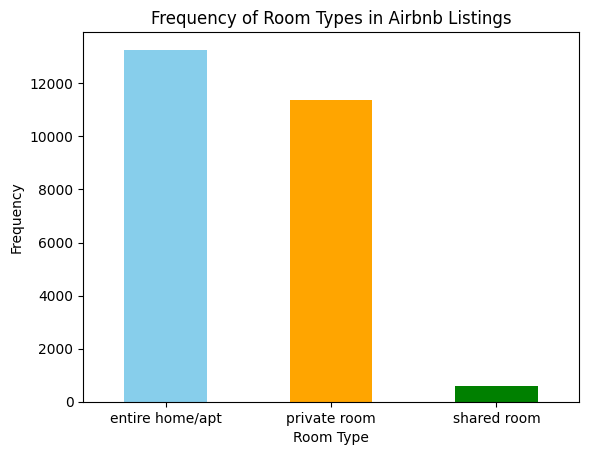

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the bar graph based on room_frequencies
room_frequencies.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Frequency of Room Types in Airbnb Listings')
plt.xticks(rotation=0)
plt.show()

In [ ]:
reviews.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [ ]:
# Change the data type of the last_review column to datetime
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
reviews["last_review"] = pd.to_datetime(reviews["last_review"])
print(type(reviews["last_review"]))

# Create first_reviewed, the earliest review date
first_reviewed = reviews["last_review"].dt.date.min()

# Create last_reviewed, the most recent review date
last_reviewed = reviews["last_review"].dt.date.max()

# Print the oldest and newest reviews from the DataFrame
print("The latest Airbnb review is {}, the earliest review is {}".format(last_reviewed, first_reviewed))

<class 'pandas.core.series.Series'>
The latest Airbnb review is 2019-07-09, the earliest review is 2019-01-01


In [ ]:
print(reviews.dtypes["last_review"])
reviews["last_review"].head()

datetime64[ns]


,last_review
0,2019-05-21
1,2019-07-05
2,2019-06-22
3,2019-06-24
4,2019-06-09


In [ ]:
# Merge prices and room_types to create rooms_and_prices
# https://pandas.pydata.org/docs/user_guide/merging.html
rooms_and_prices = pd.merge(prices, room_types,
                            how="outer",
                            on="listing_id")

# Merge rooms_and_prices with the reviews DataFrame to create airbnb_merged
airbnb_merged = pd.merge(rooms_and_prices, reviews,
                         how="outer",
                         on="listing_id")

# Drop missing values from airbnb_merged
airbnb_merged.dropna(inplace=True)

# Check if there are any duplicate values
print("There are {} duplicates in the DataFrame.".format(airbnb_merged.duplicated().sum()))

There are 0 duplicates in the DataFrame.


In [ ]:
print(airbnb_merged.info())
airbnb_merged.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25184 entries, 0 to 25201
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   listing_id       25184 non-null  int64         
 1   price            25184 non-null  float64       
 2   nbhood_full      25184 non-null  object        
 3   price_per_month  25184 non-null  float64       
 4   description      25184 non-null  object        
 5   room_type        25184 non-null  category      
 6   host_name        25184 non-null  object        
 7   last_review      25184 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.6+ MB
None


,listing_id,price,nbhood_full,price_per_month,description,room_type,host_name,last_review
0,2595,225.0,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21
1,3831,89.0,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05
2,5099,200.0,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22
3,5178,79.0,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24
4,5238,150.0,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09


In [ ]:
# Extract information from the nbhood_full column and store as a new column, borough
# Either use `.str.partition()` or `.str.split()`
airbnb_merged["borough"] = airbnb_merged["nbhood_full"].str.partition(",", expand=True)[0]

# Group by borough and calculate summary statistics
boroughs = airbnb_merged.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])

# Round boroughs to 2 decimal places, and sort by mean in descending order
boroughs = boroughs.round(2).sort_values("mean", ascending=False)

# Print boroughs
print(boroughs)

                     sum    mean  median  count
borough                                        
Manhattan      1898417.0  184.04   149.0  10315
Brooklyn       1275250.0  122.02    95.0  10451
Queens          320715.0   92.83    70.0   3455
Staten Island    22974.0   86.04    71.0    267
Bronx            55156.0   79.25    65.0    696


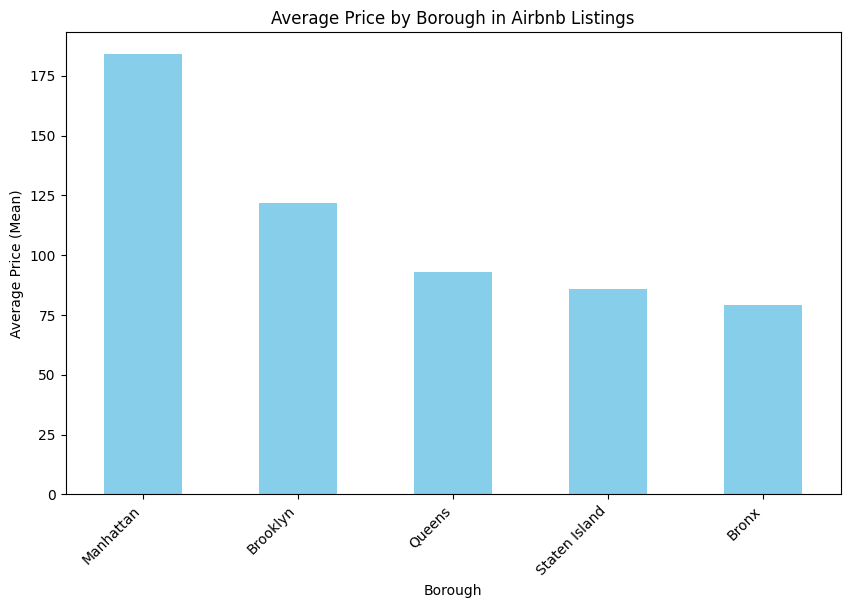

In [ ]:
# Plotting the bar graph for mean prices by borough
plt.figure(figsize=(10, 6))
boroughs['mean'].plot(kind='bar', color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Average Price (Mean)')
plt.title('Average Price by Borough in Airbnb Listings')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Create labels for the price range, label_names
label_names = ["Budget", "Average", "Expensive", "Extravagant"]

# Create the label ranges, ranges
ranges = [0, 69, 175, 350, np.inf]

# Insert new column, price_range, into DataFrame
# Use `pd.cut` to segment and sort data values into bins
# Useful for going from a continuous variable to a categorical variable
airbnb_merged["price_range"] = pd.cut(airbnb_merged["price"], bins=ranges, labels=label_names)

# Calculate borough and price_range frequencies, prices_by_borough
prices_by_borough = airbnb_merged.groupby(["borough", "price_range"])["price_range"].agg("count")
print(prices_by_borough)

borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive        20
               Extravagant       0
Name: price_range, dtype: int64


<ipython-input-27-4acb3904bb07>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prices_by_borough = airbnb_merged.groupby(["borough", "price_range"])["price_range"].agg("count")


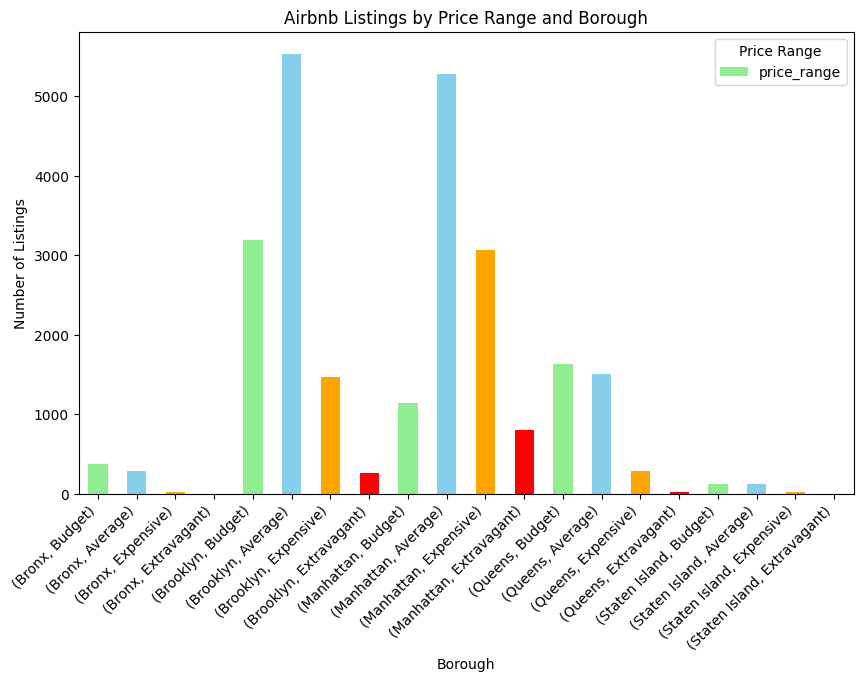

In [ ]:
# Plotting a stacked bar chart
prices_by_borough.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'skyblue', 'orange', 'red'])
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.title('Airbnb Listings by Price Range and Borough')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Range')
plt.show()